# Week3 信用情報の分析

In [101]:
import pandas as pd

home = pd.read_csv("application_train.csv")

# print(home.head())

## 【問題1】コンペティション内容の把握
---
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

*    Home Creditはどのような企業？  
     → ローン事業社として安全なローンの借入サービスを提供している企業   
     
*    このコンペティションでは何を予測する？  
     → 各申請者がローンを返済する能力を予測する   
     
*    それを予測することで企業が得られるメリットは何？   
     →返済可能なクライアントが拒否されず、成功するための融資をより多く提供できるようになる。


## 【問題2】データの概観の把握
---
データの概観を把握するために以下のようなことを行ってください。

    .head()、.info()、describe()などを使う
    欠損値の有無を見る
    クラスの割合がわかるグラフを描く


それぞれ結果に対する説明や考察も行ってください。

In [102]:
home.head()

# 122このカラムがデータセットに含まれている

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
home.info()
  
# indexの長さ（行数）：307511
# カラム数（列数）： 122
# float64型：65個、int64：41個、object：16個　→合計：122種類のデータ


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [104]:
home.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### 欠損値の有無を見る

<AxesSubplot:>

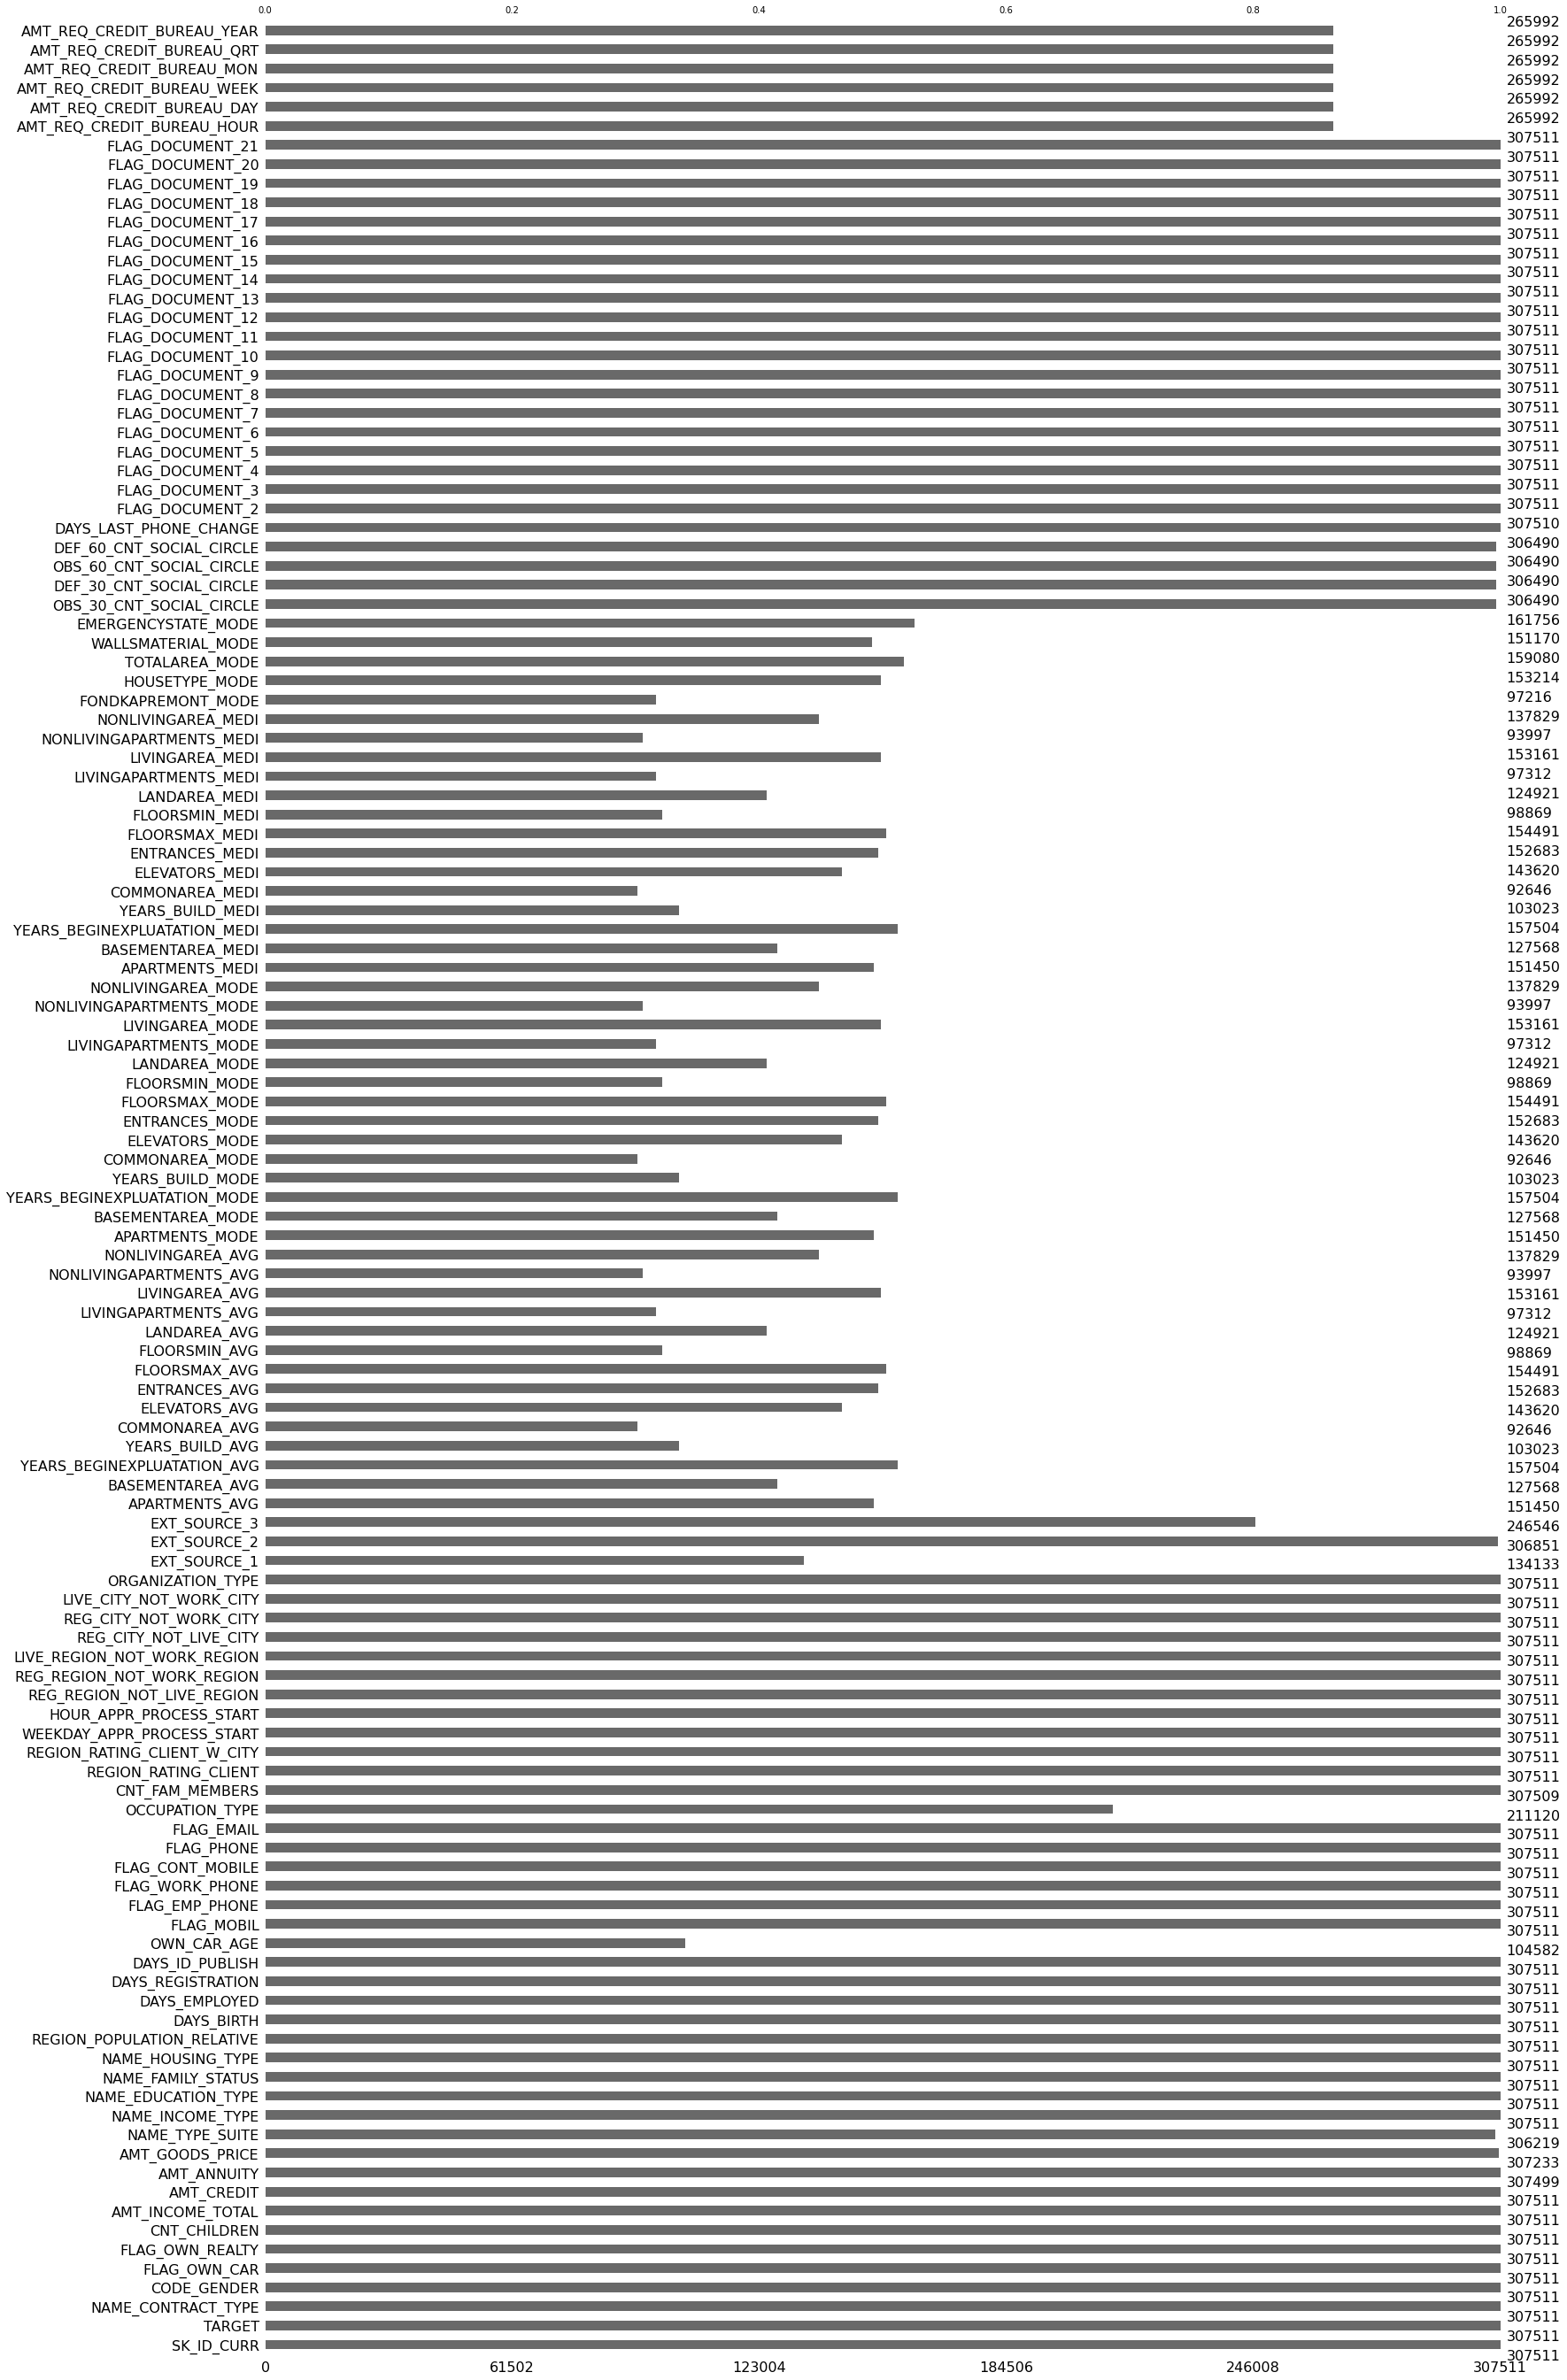

In [105]:
import missingno as msno
%matplotlib inline

# グラフで確認
msno.bar(home)

In [106]:
# 数値で確認: 欠損値の数と％の表示
num_missing = home.isnull().sum().sort_values(ascending = False)
percent = (home.isnull().sum()/home.isnull().count()*100).sort_values(ascending = False)

home_missing = pd.concat([num_missing, percent], axis=1, keys=['num_missing', 'Percent'])

home_missing[home_missing['num_missing'] > 0]

# 上記の結果により、欠損値があるデータは67個

,num_missing,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


### クラスの割合がわかるグラフを描く

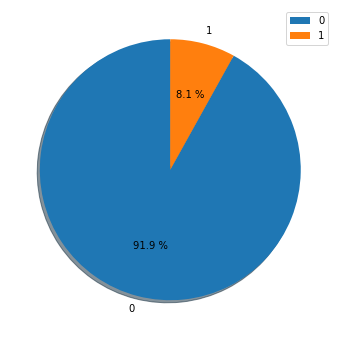

In [107]:
# TARGETのクラスの割合を円グラフで表示する
# 値 0: それ以外の場合、1：支払が困難なクライアント
import matplotlib.pyplot as plt
%matplotlib inline

home_data = home["TARGET"].value_counts()
plt.figure(figsize = (6, 6))
plt.pie(home_data, labels = home_data.index, autopct="%1.1f %%", shadow=True, startangle=90)
plt.legend()
plt.show()


目的変数の割合は上図の通り、ローンの支払困難が約8%である。

## 【問題3】課題設定
---
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

*  データセットからどのようなデータのパターンが潜在しているのか？
*  性別、年齢、職業別、家族構成、収入、持ち家or賃貸、車所有の有無、住んでいる地域、ローンのクレジット額などの特徴量と目的変数の関係性はどうのようになっているのか？
*  どのような説明変数がローンの返済能力に大きい影響を与えているのか？

## 【問題4】データ探索
---
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)

%matplotlib inline

def show_bar_graph(col_name, title_str):
    '''
    目的変数の値別にデータのヒストグラムのグラフを表示
    
    Parameters:
    ----------------
    col_name : 表示するデータのカラム名
    title_str : グラフのタイトル名
    '''
    
    plt.figure(figsize = (8, 5))
    plt.title(title_str, fontsize=15)
    plt.xticks(rotation=-30)

    sns.countplot(x = col_name, hue = "TARGET",data = home, order = home[col_name].value_counts().index, palette="Pastel1")
    
    plt.grid(axis = "y", alpha = 0.5)
    plt.show()

    
def show_bar_graph2(col_name, title_str):
    '''
    データのヒストグラムのグラフををcountplotを使って表示
    
    Parameters:
    ----------------
    col_name : 表示するデータのカラム名
    title_str : グラフのタイトル名
    '''
    
    plt.figure(figsize = (20, 5))
    plt.title(title_str, fontsize=15)
    plt.xticks(rotation=-30)

    sns.countplot(x = col_name ,data = home, order = home[col_name].value_counts().index, palette="Pastel2")
    
    plt.grid(axis = "y", alpha = 0.5)
    plt.show()
    
def show_distribution(col_name, title_str):
    '''
    データのヒストグラムのグラフをdistplotを使って表示
    
    Parameters:
    ----------------
    col_name : 表示するデータのカラム名
    title_str : グラフのタイトル名
    '''
    plt.figure(figsize=(10,6))
    plt.title(title_str, fontsize=15)
    sns.distplot(home[col_name].dropna(), color='blue')
    plt.show() 
    

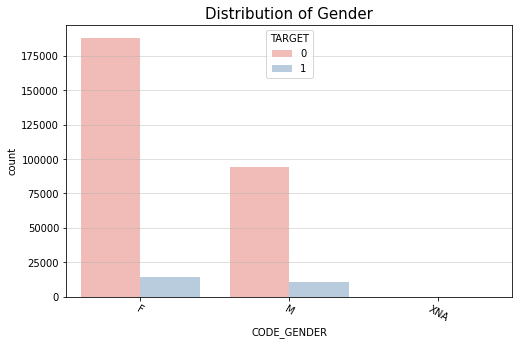

In [109]:
# 目的変数別の性別
show_bar_graph('CODE_GENDER', 'Distribution of Gender')

性別に関して、目的変数が「それ以外の場合」では女性の方が約2倍返済能力があり、「返済困難」の数は男女に大きな差はないが、男性の方が密度が2倍高い。

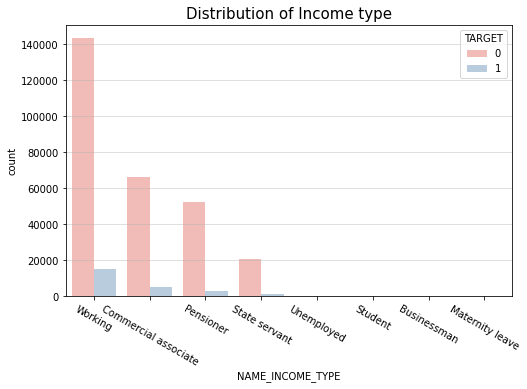

In [110]:
# 目的変数と収入タイプの関係
show_bar_graph('NAME_INCOME_TYPE', 'Distribution of Income type')

収入タイプでは、労働者が一番多い。また、無職や学生のクライアントは収入はほぼ無いに等しい。

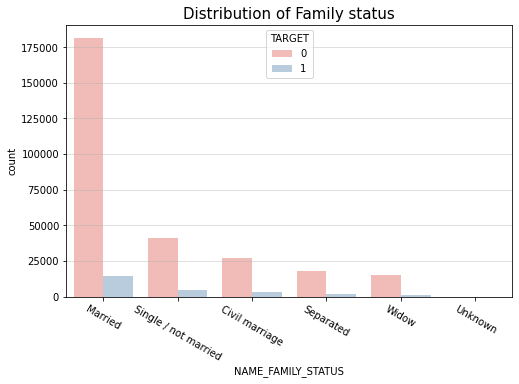

In [111]:
# 目的変数と家族状態の関係
show_bar_graph('NAME_FAMILY_STATUS', 'Distribution of Family status')

家族形態においては、既婚者が圧倒的に一番多く融資を受けている。

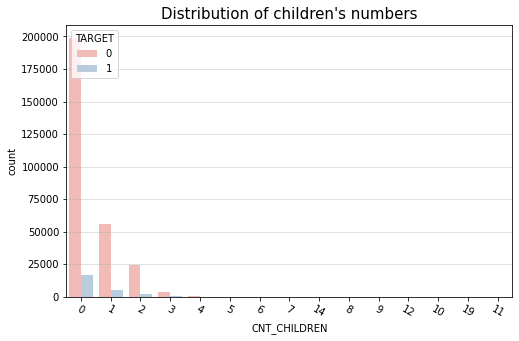

In [112]:
# 目的変数と子供の数の関係
show_bar_graph('CNT_CHILDREN', 'Distribution of children\'s numbers')

子供がいない家庭が一番多く、4人以上の場合はほぼ融資を受けていない。

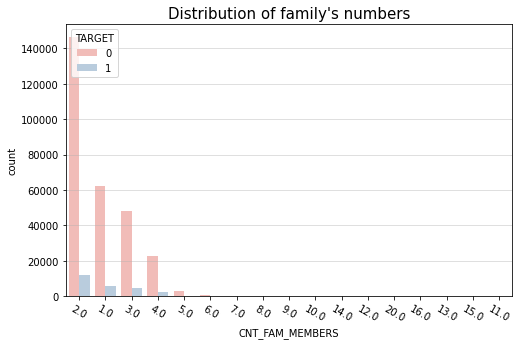

In [113]:
# 目的変数と家族の人数の関係
show_bar_graph('CNT_FAM_MEMBERS', 'Distribution of family\'s numbers')

家族の人数が「2名」のケースが一番多い、次いで一人（独身、未亡人など）が多い。

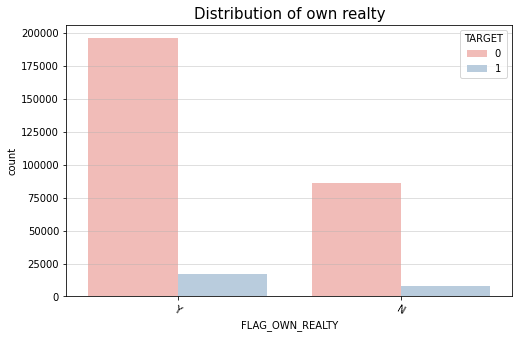

In [114]:
# 目的変数別の持家の有無
show_bar_graph('FLAG_OWN_REALTY', 'Distribution of own realty')

クライアントが家またはアパートを所有している方が多い。

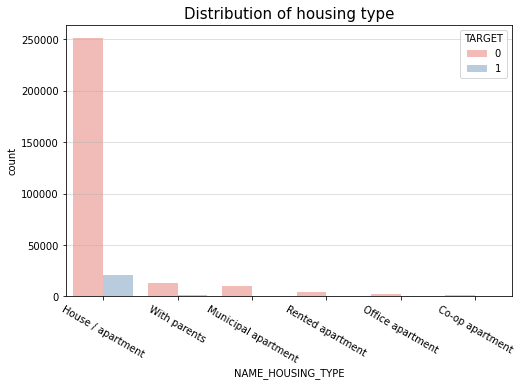

In [115]:
# 目的変数と住宅の種類の関係
show_bar_graph('NAME_HOUSING_TYPE', 'Distribution of housing type')

持家またはアパートに住んでいるクライアントが突出して一番多い。また、グラフより返済困難なクライアントも持家またはアパートに住んでいる人が大半を占めている。

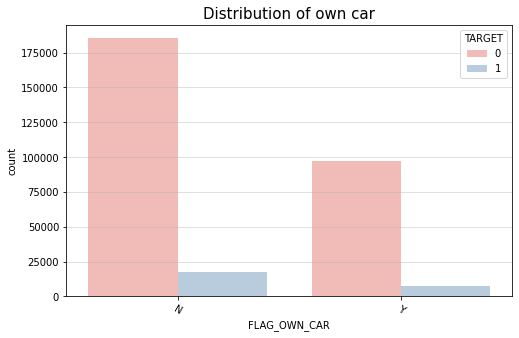

In [116]:
# 目的変数と自車所有の有無の関係
show_bar_graph('FLAG_OWN_CAR', 'Distribution of own car')

自動車を所有していないクライアントの方が多い。返済困難の割合に関してははあまり差はない。

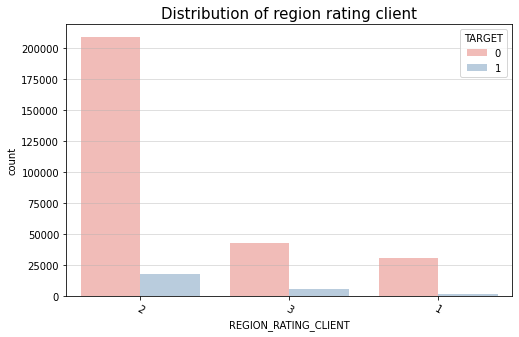

In [117]:
# クライアントが住んでいる地域の評価
show_bar_graph('REGION_RATING_CLIENT', 'Distribution of region rating client')

クライアントが住んでいる地域の評価では中間レベルが一番多い。続いて、上位レベルがきている。下位レベルに関しては融資サービスを利用している割合も少なく、返済困難者の数も無いに等しい。

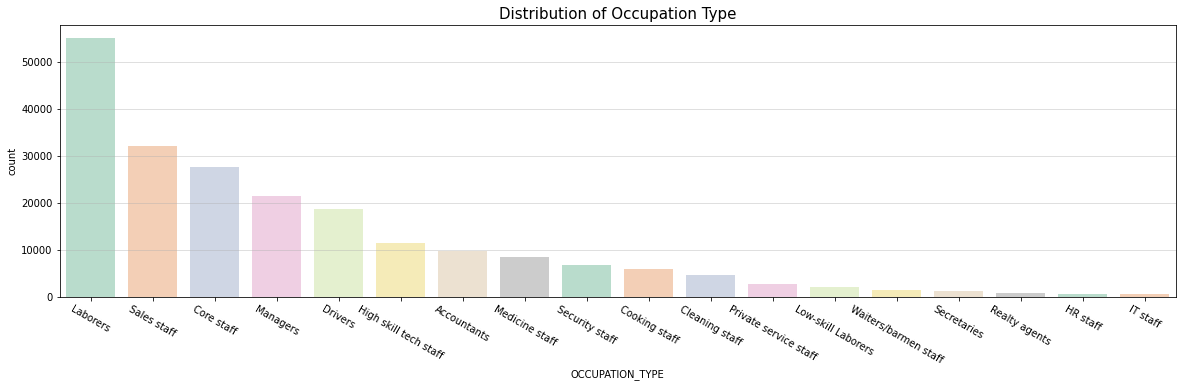

In [118]:
# 職種別
show_bar_graph2('OCCUPATION_TYPE', 'Distribution of Occupation Type')

申請者しているクライアントの職業で労働者が一番多く、次に販売員、コアスタッフ、管理職、ドライバーと続いている。
逆にITスタッフやHRスタッフの申請者はかなり少ない。

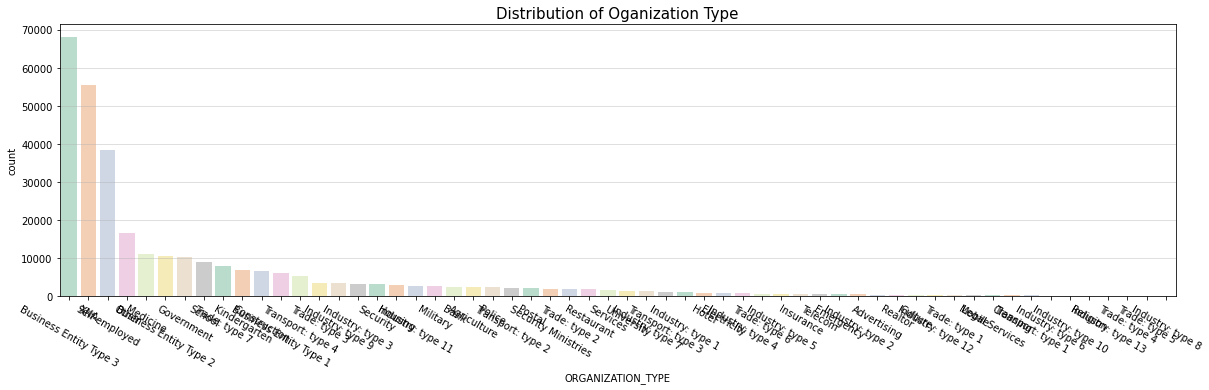

In [119]:
# 組織別
show_bar_graph2('ORGANIZATION_TYPE', 'Distribution of Oganization Type')

In [120]:
home['ORGANIZATION_TYPE'].value_counts().head(10)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Name: ORGANIZATION_TYPE, dtype: int64

組織としては「ビジネスエンティティ タイプ３」が一番多い。

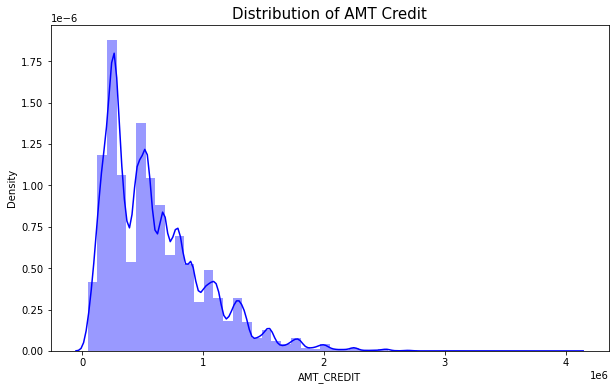

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: AMT_CREDIT, Length: 5603, dtype: int64

In [121]:
show_distribution('AMT_CREDIT', 'Distribution of AMT Credit')
home.AMT_CREDIT.value_counts()

ローンのクレジット額は450000ドルが一番多い。

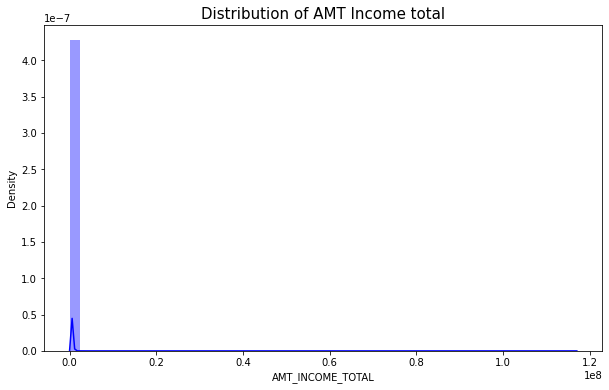

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [122]:
show_distribution('AMT_INCOME_TOTAL', 'Distribution of AMT Income total')
home.AMT_INCOME_TOTAL.value_counts()

収入は15万ドル前後がほとんどを占めている。

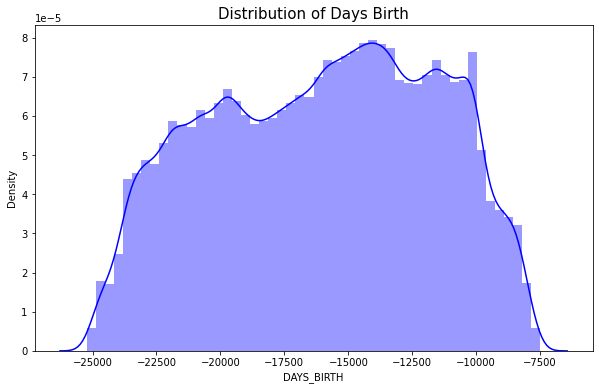

In [123]:
show_distribution('DAYS_BIRTH','Distribution of Days Birth')

クライアントの年齢レンジはおよそ21～68歳である。20代後半から40代前半が比較的多い。

<AxesSubplot:>

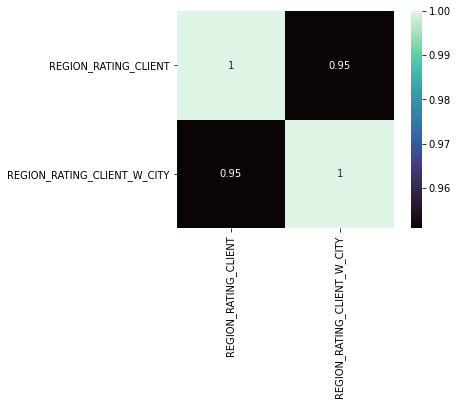

In [124]:
df_corr = home.loc[:, ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']].corr()
cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(df_corr, square=True, annot=True, cmap=cmap)

上記のヒートマップよりクライアントが住んでいる地域と都市の評価の相関は0.95と強い正の相関と言える。

<AxesSubplot:>

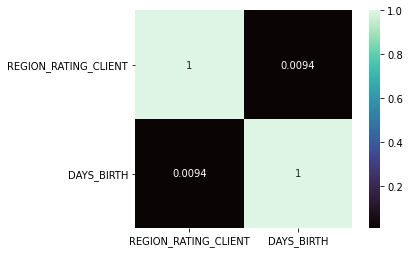

In [125]:
df_corr = home.loc[:, ['REGION_RATING_CLIENT', 'DAYS_BIRTH']].corr()
cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(df_corr, square=True, annot=True, cmap=cmap)

上記のヒートマップより年齢とそのクライアントが住んでいる地域評価の相関は0.0094無相関と言える。

### Overview:

    子供がいない既婚者がかつ、配偶者が男性の方が比較的返済困難の比率が高い。
    また、持家やアパートに住んで、かつ自動車を所有しているクライアントが
    ローンを利用していることがデータより読み取れる。